In [1]:
include("../src/fractional_derivative.jl")
using .fractional_derivative, Plots, SpecialFunctions, LaTeXStrings, MittagLeffler

# Benchmark cases for the Fractional derivative

**Definitions used:**
*  Riemann-Liouville derivative:
    $$^{RL}_{a}D^{\alpha}_t f(t) = \frac{1}{\Gamma(n-\alpha)}\frac{d^n}{dt^n}\int_a^t \frac{f(\tau)}{(t-\tau)^{\alpha+1-n}}d\tau$$

* Grünwald–Letnikov derivative (implemente in [src/fractional_derivative.jl](../src/fractional_derivative.jl)):
    $$^{GL}_{a}D_{t}^{\alpha} = \lim_{h\rightarrow 0} \frac{1}{h^{\alpha}} \sum_{j=0}^n (-1)^j {\alpha \choose j} f(t-jh) $$
    where $n = \frac{t-a}{h}$

Where both definitions satisfy: $^{GL}D_{t}^{\alpha} = ^{RL}_{a}D^{\alpha}_t f(t)$

**Benchmark functions:**

1. $f(t) = t^{\sigma}$; $^{RL}_{0}D^{\alpha}_t t^{\sigma} = \frac{\Gamma(\sigma + 1)}{\Gamma(\sigma - \alpha + 1)}t^{\sigma - \alpha}$

2. $f(t) = e^{t}$; $^{RL}_{0}D^{\alpha}_t e^{t} = t^{-\alpha}E_{1,1-\alpha}(t-\alpha)$

Where $E_{p,q}$ is the Mittag-Leffler function: $E_{p, q} = \sum_{k=0}^{\infty} \frac{z^k}{\Gamma(p k + q)}$


In [2]:
function analytical1(t, sigma, alpha)
    return gamma(sigma+1)/gamma(sigma-alpha+1)*t.^(sigma - alpha)
end

function analytical2(time, alpha)
    anl = []
    for t in time
        append!(anl, [mittleff(1, 1-alpha, t)*(t^(-alpha))])
    end
    return anl    
end;

In [3]:
dt = 0.01
tf = 1
N = Int(1/dt)
times = [i*dt for i in 0:N];

In [4]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1]
sigma = 3
test_func1 = [(t)^sigma for t in times];

for (i, a) in enumerate(alpha)
    num = grunwald_letnikov(a, test_func1, dt)
    if (i== 1)
        plot(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    else
        plot!(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    end
    if (i== length(alpha))
        plot!(times, num, color = "navy", linestyle = :dash, label = "Numerical")
    else
        plot!(times, num, color = "navy", linestyle = :dash, label = "")
    end
end
p1 = plot!(title=L"D^{\alpha}[t^{%$sigma}]");

In [5]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
test_func2 = [exp(t) for t in times]

for (i, a) in enumerate(alpha)
    num = grunwald_letnikov(a, test_func2, dt)
    if (i== 1)
        plot(times, analytical2(times, a), label = L"\alpha = %$a")
    else
        plot!(times, analytical2(times, a), label = L"\alpha = %$a")
    end
    if (i== length(alpha))
        plot!(times, num, color = "navy", linestyle = :dash, label = "Numerical")
    else
        plot!(times, num, color = "navy", linestyle = :dash, label = "")
    end
end
p2 = plot!(title=L"D^{\alpha}[exp(t)]", yaxis=:log);

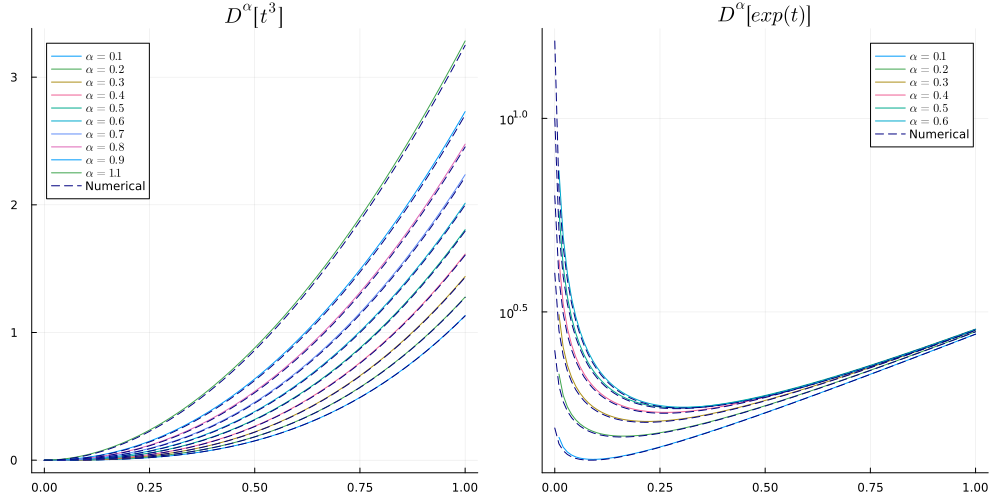

In [6]:
display(plot(p1, p2, size = (1000, 500)))

# Orden entero

In [20]:
alpha = [1.1, 1., 0.9]
sigma = 3
test_func1 = [(t)^sigma for t in times];

for (i, a) in enumerate(alpha)
    num = grunwald_letnikov(a, test_func1, dt)
    if (i== 1)
        plot(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    else
        plot!(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    end
end
p1 = plot!(title=L"D^{\alpha}[t^{%$sigma}]");

In [35]:
alpha = [0.9, 1., 1.1, 1.9, 2, 2.1]
sigma = 2
test_func2 = [(t)^sigma for t in times];

for (i, a) in enumerate(alpha)
    if (i== 1)
        plot(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    else
        plot!(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    end
end
p2 = plot!(title=L"D^{\alpha}[t^{%$sigma}]");

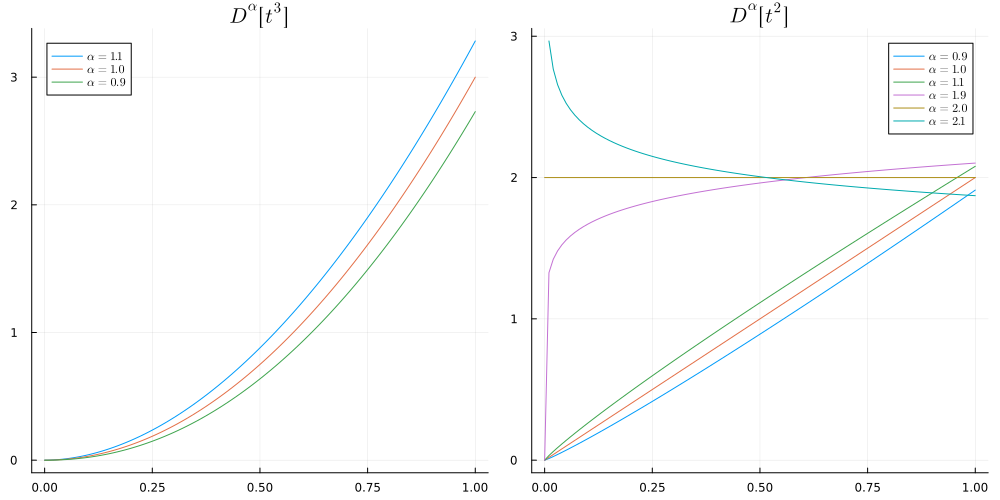

In [36]:
display(plot(p1, p2, size = (1000, 500)))

# Errors on the estimation for integer orders

In [21]:
alpha = [1, 2, 3, 4, 5, 6, 7]
correction = 0.00001
for a in alpha
    println("######################################################")
    try
        num = grunwald_letnikov(a, test_func1, dt)
        println("Success with order $a")
    catch y
        println("Error calculating integer order derivative: $a: ", y)
        try 
            num = grunwald_letnikov(a+correction, test_func1, dt)
            println("Success with order correction $a + $correction")
        catch y
            println("Error calculating order: $a + $correction: ", y)
        end
    end
end
    

######################################################
Error calculating integer order derivative: 1: DomainError(-1, "`n` must not be negative.")
Success with order correction 1 + 1.0e-5
######################################################
Error calculating integer order derivative: 2: DomainError(-1, "`n` must not be negative.")
Success with order correction 2 + 1.0e-5
######################################################
Error calculating integer order derivative: 3: DomainError(-1, "`n` must not be negative.")
Success with order correction 3 + 1.0e-5
######################################################
Error calculating integer order derivative: 4: DomainError(-1, "`n` must not be negative.")
Success with order correction 4 + 1.0e-5
######################################################
Error calculating integer order derivative: 5: DomainError(-1, "`n` must not be negative.")
Success with order correction 5 + 1.0e-5
######################################################
Error

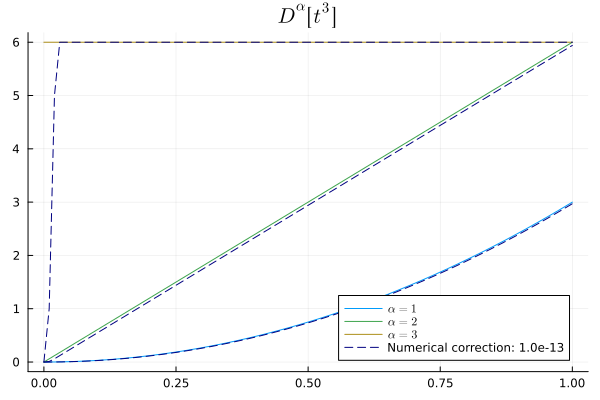

In [45]:
alpha = [1, 2, 3]

for (i, a) in enumerate(alpha)
    corr = 0.0000000000001
    num = grunwald_letnikov(a + corr, test_func1, dt)
    if (i== 1)
        plot(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    else
        plot!(times, analytical1(times, sigma, a), label = L"\alpha = %$a")
    end
    if (i== length(alpha))
        plot!(times, num, color = "navy", linestyle = :dash, label = "Numerical correction: $corr")
    else
        plot!(times, num, color = "navy", linestyle = :dash, label = "")
    end
end
p1 = plot!(title=L"D^{\alpha}[t^{%$sigma}]")